# What are the most important internal and external features in predicting rental prices? 

In [93]:
import pandas as pd

df = pd.read_csv('../data/curated/realestate_with_closest_distance_duration.csv')
df2 = pd.read_csv('../data/curated/realestate_coor_school.csv')[['id', 'min_sec_icsea', 'min_pri_icsea']]

df2['min_pri_icsea'] = pd.to_numeric(df2['min_pri_icsea'], errors='coerce')
df2['min_sec_icsea'] = pd.to_numeric(df2['min_sec_icsea'], errors='coerce')

df = df.join(df2, lsuffix='id', rsuffix='id')

In [94]:
df = df[['suburb', 'postcode', 'price', 'propertyType',
       'bedrooms', 'bathrooms', 'parkingSpaces', 'studies', 'furnished',
       'closest_primary_duration', 'closest_secondary_duration',
       'closest_train_duration', 'closest_tram_duration', 'closest_bus_duration',
       'closest_park_duration', 'min_pri_icsea', 'min_sec_icsea']]

In [95]:
df.corr()

,postcode,price,bedrooms,bathrooms,parkingSpaces,studies,closest_primary_duration,closest_secondary_duration,closest_train_duration,closest_tram_duration,closest_bus_duration,closest_park_duration,min_pri_icsea,min_sec_icsea
postcode,1.000000,0.051319,0.092818,0.057613,0.119880,-0.006227,-0.010998,-0.052593,0.040688,0.079156,-0.007302,-0.009945,0.000964,-0.050472
price,0.051319,1.000000,0.412856,0.479292,0.202823,0.133129,-0.027147,-0.049586,-0.096275,-0.187710,0.022910,-0.184891,0.277579,0.267611
bedrooms,0.092818,0.412856,1.000000,0.559250,0.545468,0.060664,0.061497,0.148739,0.382105,0.411836,0.087403,0.238119,-0.225972,-0.250312
bathrooms,0.057613,0.479292,0.559250,1.000000,0.338049,0.122663,0.092277,0.091258,0.251580,0.228669,0.083213,0.084435,-0.034211,-0.029606
parkingSpaces,0.119880,0.202823,0.545468,0.338049,1.000000,0.066055,0.024225,0.097513,0.292353,0.339371,0.036242,0.217118,-0.216453,-0.278153
studies,-0.006227,0.133129,0.060664,0.122663,0.066055,1.000000,0.025427,0.002578,0.032995,0.006248,0.018216,0.000670,0.021652,0.039745
closest_primary_duration,-0.010998,-0.027147,0.061497,0.092277,0.024225,0.025427,1.000000,0.366480,0.345333,0.201108,0.332796,0.088476,-0.077859,0.036225
closest_secondary_duration,-0.052593,-0.049586,0.148739,0.091258,0.097513,0.002578,0.366480,1.000000,0.397019,0.271695,0.253712,0.134823,-0.104761,-0.099961
closest_train_duration,0.040688,-0.096275,0.382105,0.251580,0.292353,0.032995,0.345333,0.397019,1.000000,0.562188,0.272903,0.270970,-0.307694,-0.254139
closest_tram_duration,0.079156,-0.187710,0.411836,0.228669,0.339371,0.006248,0.201108,0.271695,0.562188,1.000000,0.155886,0.281017,-0.563182,-0.530005


<AxesSubplot:xlabel='closest_primary_duration', ylabel='Count'>

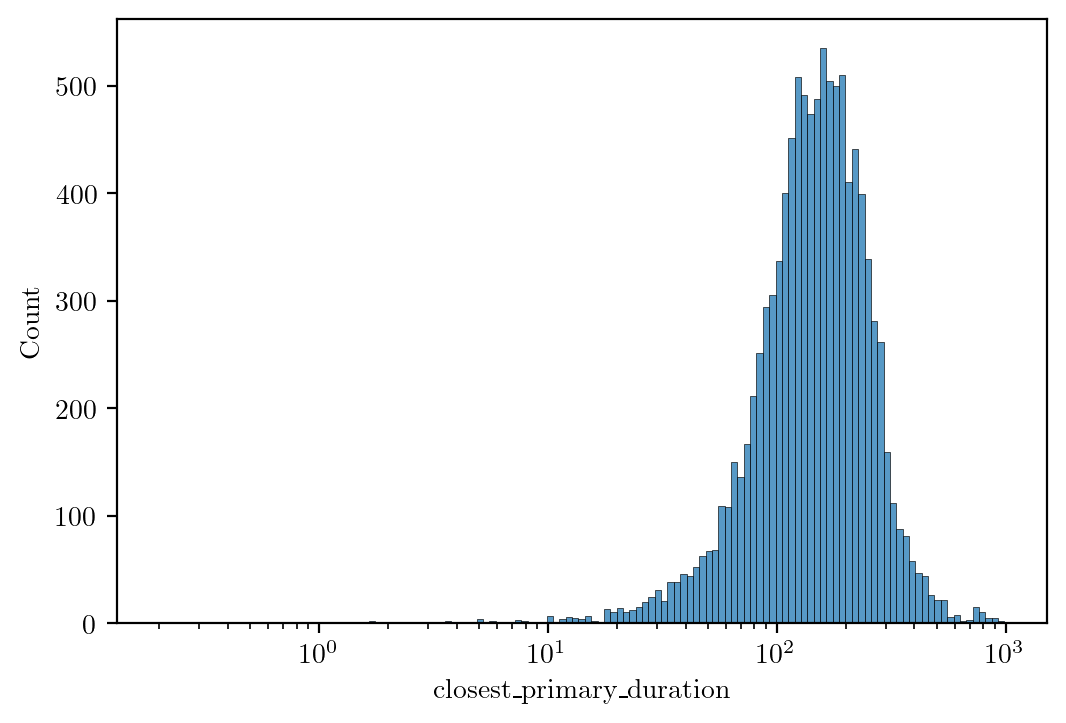

In [96]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(df, x='closest_primary_duration', log_scale=True)

<AxesSubplot:xlabel='closest_park_duration', ylabel='Count'>

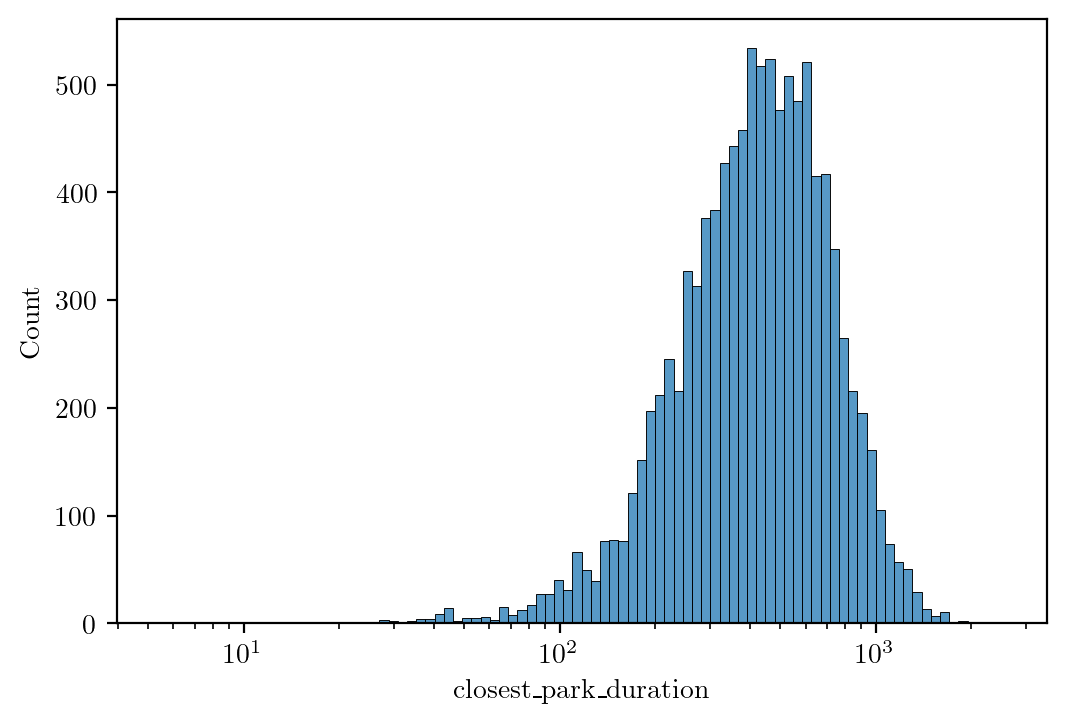

In [97]:
sns.histplot(df, x='closest_park_duration', log_scale=True)

<AxesSubplot:xlabel='closest_secondary_duration', ylabel='Count'>

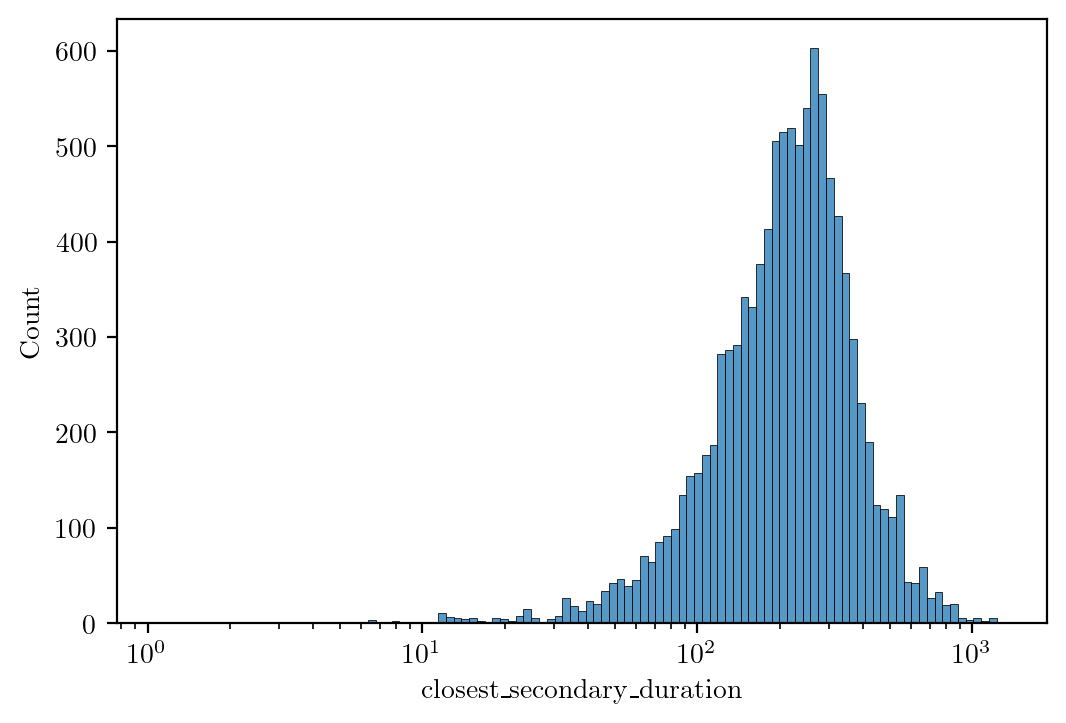

In [98]:
sns.histplot(df, x='closest_secondary_duration', log_scale=True)

<AxesSubplot:xlabel='closest_tram_duration', ylabel='Count'>

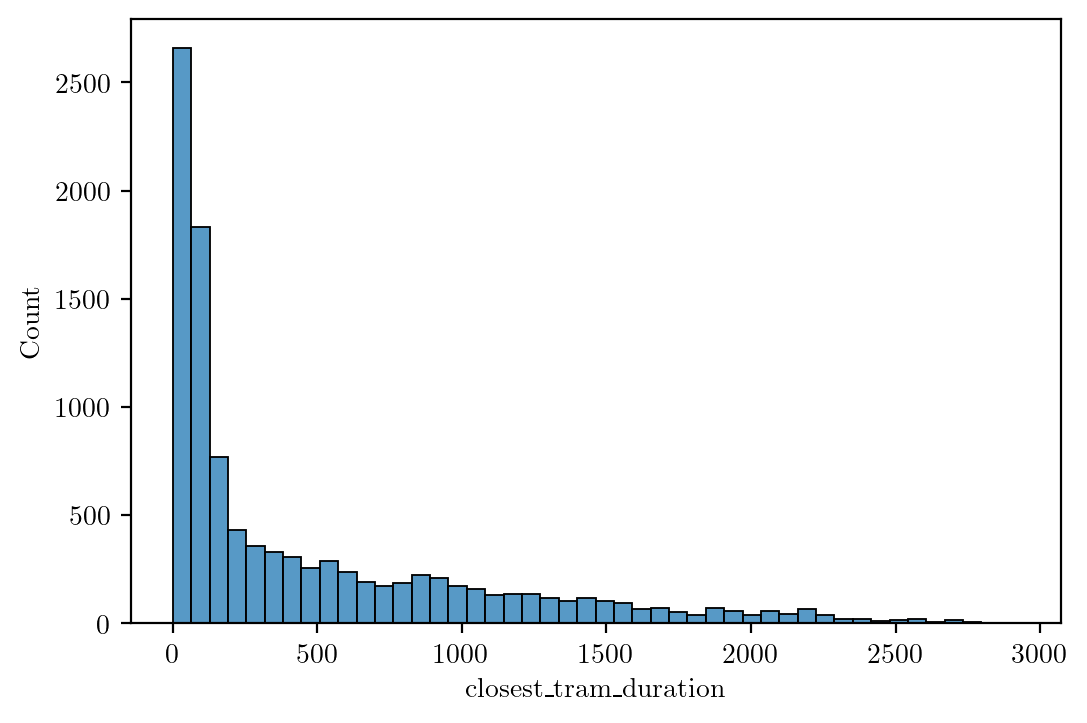

In [99]:
sns.histplot(df, x='closest_tram_duration', log_scale=False)

In [100]:
def bedroom_map(elem):
    if elem in {0,1}:
        return 1
    elif elem <= 3:
        return elem
    else: 
        return '4+'

df.loc[:,'bedrooms'] = df['bedrooms'].apply(bedroom_map)
df.loc[:,'parkingSpaces'] = df['parkingSpaces'].apply(lambda p: p if p < 3 else '3+')
df.loc[:,'bathrooms'] = df['bathrooms'].apply(lambda p: p if p < 3 else '3+')


In [101]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 200

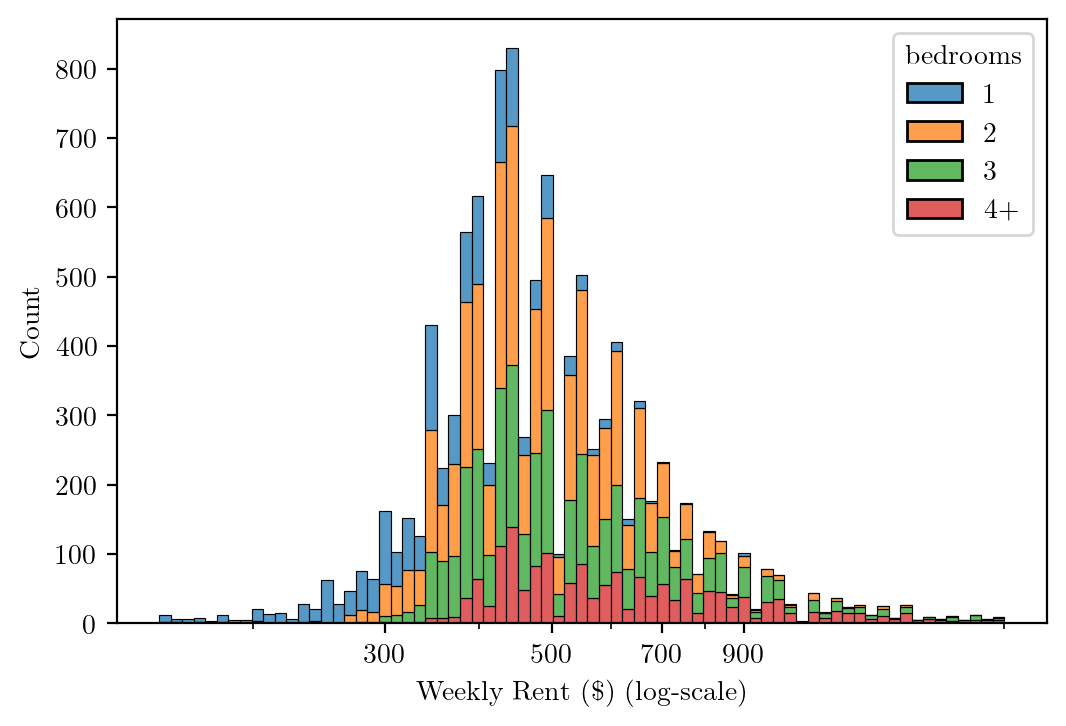

In [102]:
sns.histplot(df, x='price', hue='bedrooms', log_scale=True, multiple='stack', hue_order = [1, 2, 3, '4+'])
plt.xlabel('Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700,  900], labels=['300', '500', '700', '900'])
plt.savefig('../plots/rent-distn-by-bedrooms.png')

* More bedrooms -> more rent

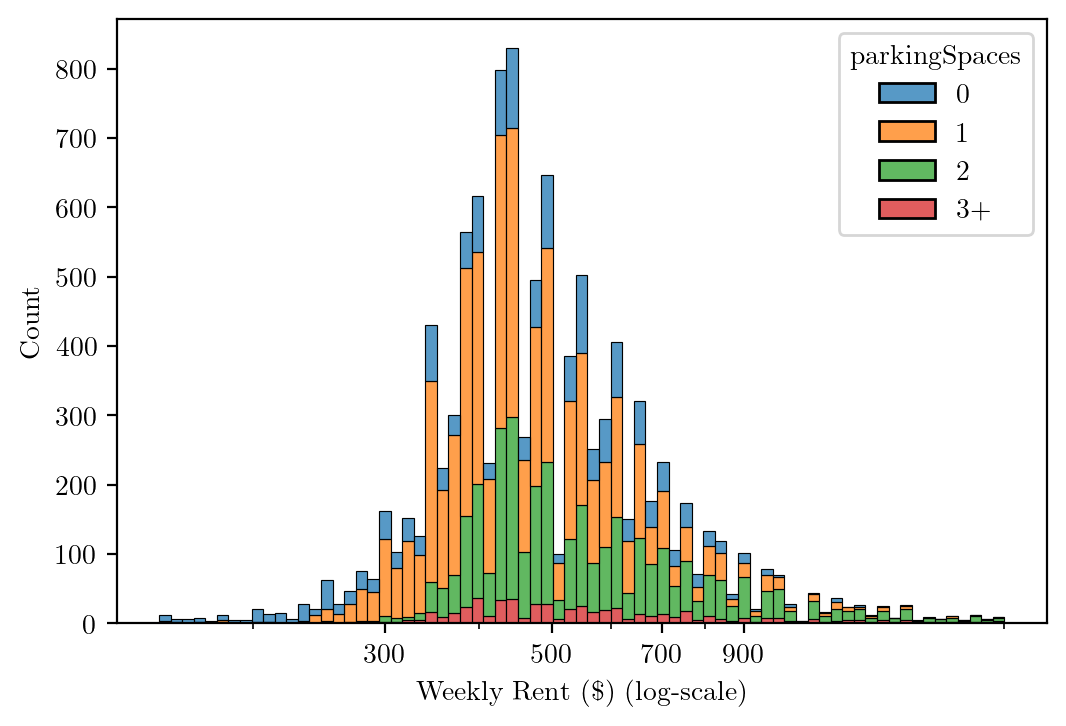

In [103]:
sns.histplot(df, x='price', hue='parkingSpaces', log_scale=True, multiple='stack')
plt.xlabel('Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700,  900], labels=['300', '500', '700', '900'])
plt.savefig('../plots/rent-distn-by-parking.png')

* Properties less than $300 almost never have more than 1 parking space
* It is rare for a property to have more than 2 parking spaces, when it does, it doesn't seem to impact the rent

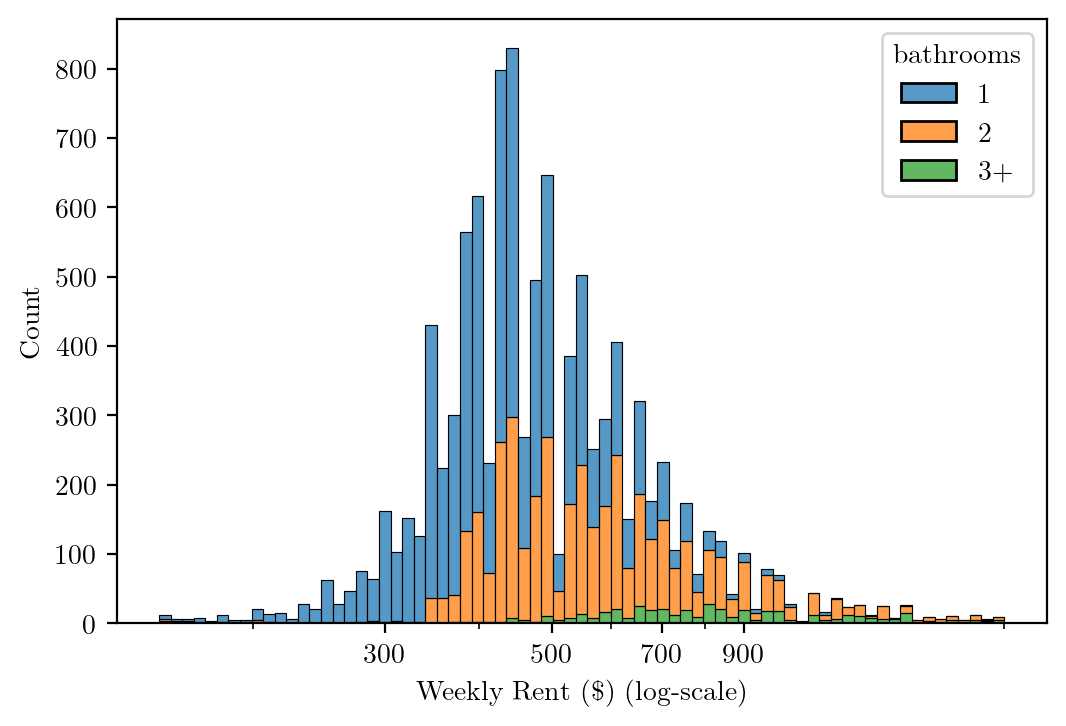

In [104]:
sns.histplot(df, x='price', hue='bathrooms', log_scale=True, multiple='stack')
plt.xlabel('Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700,  900], labels=['300', '500', '700', '900'])
plt.savefig('../plots/rent-distn-by-bathrooms.png')

* Affordable properties almost never have more than 1 bathroom.
* Few properties have more than 2 bathrooms, those which do attract a premium.

In [105]:
df.loc[:,'propertyType'] = df['propertyType'].apply(lambda t: t if t in ['Studio', 'House', 'Apartment'] else 'Other')

<AxesSubplot:xlabel='propertyType', ylabel='Count'>

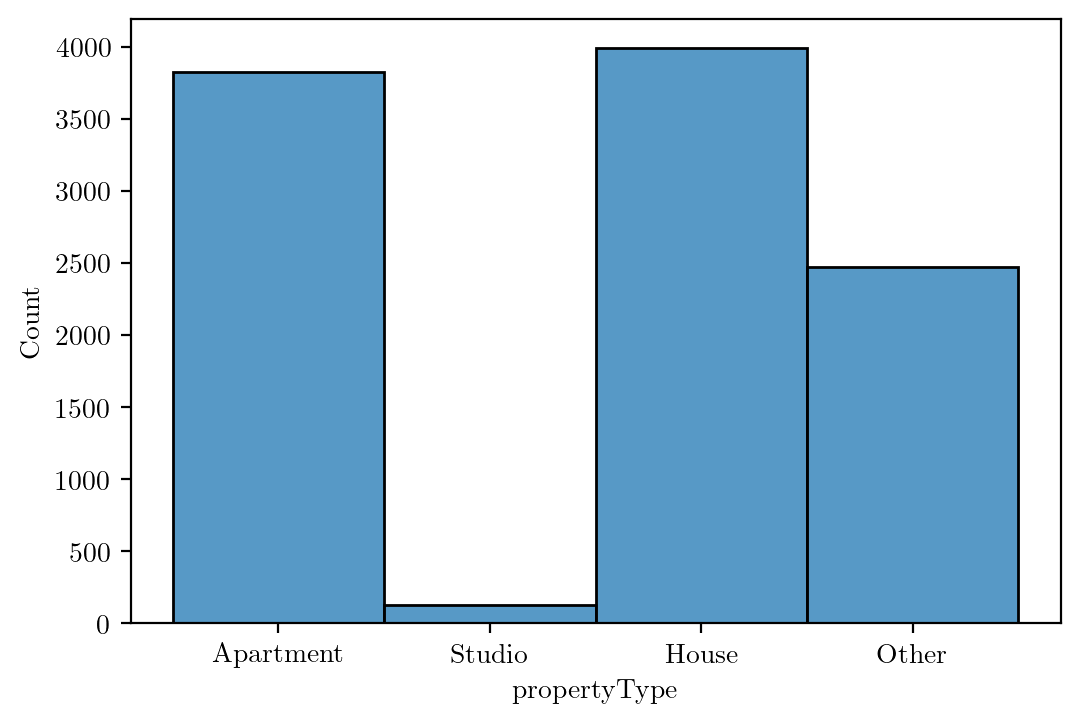

In [106]:
sns.histplot(data=df, x='propertyType')

In [107]:
from statsmodels.formula.api import ols, glm, wls
from statsmodels.api import families


model = ols(formula="""price ~ closest_train_duration + closest_tram_duration + closest_bus_duration + closest_park_duration + min_pri_icsea + min_sec_icsea """,
            data=df)

model.fit().summary()

# Model interpretation:
# 
# Effect of suburb properties on rental income, after accounting for property type and bedroom count
#
# Train station distance has no effect
# Properties close to tram stops are valued more
# Properties further from bus stops are valued more
# Properties close to parks are valued more
# Primary school ICSEA increases value alot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.32e-185
Time:                        19:11:58   Log-Likelihood:                -56645.
No. Observations:                8399   AIC:                         1.133e+05
Df Residuals:                    8392   BIC:                         1.134e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -476.8237     52.917     -9.011      0.000    -580.554    -373.093
closest_train_duration     0.0335      0.014      2.365      0.018       0.006       0.061
closest_tram_duration      0.0080      0.006      1.386      0.166      -0.003       0.019
closest_bus_duration       0.1104      0.031      3.508      0.000       0.049       0.172
closest_park_duration     -0.0878      0.010     -8.391      0.000      -0.108      -0.067
min_pri_icsea              0.5796      0.047     12.376      0.000       0.488       0.671
min_sec_icsea              0.3714      0.047      7.905      0.000       0.279       0.464
==============================================================================
Omnibus:                     4222.374   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35308.801
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      11.969   Cond. No.                     3.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:

model = ols(formula="""price ~ closest_primary_duration + closest_secondary_duration""",
            data=df)

model.fit().summary()

# Model interpretation:
# 
# Effect of suburb properties on rental income, after accounting for property type and bedroom count
#
# Primary school distance has no effect
# Properties closer to public secondary schools are valued more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.33
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.66e-06
Time:                        19:11:58   Log-Likelihood:                -70575.
No. Observations:               10422   AIC:                         1.412e+05
Df Residuals:                   10419   BIC:                         1.412e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    540.6970      4.887    110.629      0.000     531.117     550.277
closest_primary_duration      -0.0234      0.024     -0.986      0.324      -0.070       0.023
closest_secondary_duration    -0.0723      0.017     -4.354      0.000      -0.105      -0.040
==============================================================================
Omnibus:                     5513.667   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46893.439
Skew:                           2.413   Prob(JB):                         0.00
Kurtosis:                      12.203   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""